In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/train', transform=train_transforms)
test_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class RBFNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RBFNet, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.rbf = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        x = self.hidden(x)
        x = torch.tanh(x)
        x = self.rbf(x)
        return x

In [ ]:
input_size = 64
hidden_size = 100
output_size = 2
rbf_net = RBFNet(input_size, hidden_size, output_size)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
writer = SummaryWriter('runs/pistachio-exp')

In [ ]:
dataiter = iter(train_loader)
images,labels = next(dataiter)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1])


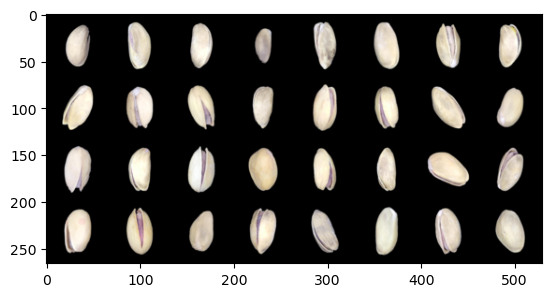

In [ ]:
img_grid = torchvision.utils.make_grid(images)
# img, label = test_dataset[780]
plt.imshow(img_grid.permute((1, 2, 0)))
print(labels)

In [ ]:

writer.add_image('Pistachio-Image', img_grid)

In [ ]:
# % tensorboard --logdir=runs
# %tensorboard --logdir = 'runs/'
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=runs --port=6006


In [ ]:
images.shape

torch.Size([32, 3, 64, 64])

In [ ]:
writer.add_graph(rbf_net,images)
writer.close()

In [ ]:
running_loss = 0.0
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rbf_net.parameters(), lr=0.001)
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.view(-1, input_size)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = rbf_net(inputs)
        # print(outputs.shape,labels.shape)
        outputs = torch.sum(outputs, dim=0)
        labels = outputs[:32]
        #print(outputs.shape,labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(train_loader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(train_loader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training
